In [1]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
import seaborn as sn
from tabulate import tabulate

In [2]:
#consts

filename= 'fb_27_01_2021 18_51_42.csv'

In [3]:
# functions

def calculate_jaccard_score(test_y, predict):
    return jaccard_score(test_y, predict, average="macro")

def print_conf_matrix(test_y, predict, name):
    matrix = confusion_matrix(test_y, predict,  labels=[-1, 0, 1])
    print(matrix)
    ax= plt.subplot()
    sn.heatmap(matrix, annot=True, ax = ax) #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels', color='white')
    ax.set_ylabel('True labels', color='white')
    ax.set_title(f'Confusion Matrix for {name}' , color='white')
    ax.xaxis.set_ticklabels(['-1','0', '1'], color='white')
    ax.yaxis.set_ticklabels(['-1','0', '1'], color='white')
    plt.show()

def train_model(model,train_x, train_y):
    model.fit(train_x, train_y)

def cross_valid(model, x , y , folds= 5):
    return cross_val_score(model, x, y, cv=folds, n_jobs=-1)

In [4]:
df = pd.read_csv(f'../data/preprocess/{filename}')

df.head(10)

,Date,Time,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
0,2017-05-17,19:00:00,147.4200,147.5000,146.8800,147.4040,1447021,-0.0160,0.6200,0.0160,...,0.4560,-0.1895,-0.2940,146.952525,147.058350,145.875400,146.311000,1.18295,0.641525,0
1,2017-05-17,20:00:00,147.4001,147.4200,146.5800,146.9100,1639010,-0.4940,0.8400,0.4901,...,0.1951,0.9301,0.2846,146.952525,147.058350,145.875400,146.311000,1.18295,0.641525,-1
2,2017-05-17,21:00:00,146.9100,146.9834,145.6200,146.0800,3303803,-0.8300,1.3634,0.8300,...,0.5107,0.5350,1.2700,146.952525,147.058350,145.875400,146.311000,1.18295,0.641525,-1
3,2017-05-17,22:00:00,146.0800,146.3300,144.4216,144.8500,7778376,-1.2300,1.9084,1.2300,...,1.5250,0.9107,0.9350,146.952525,147.058350,145.875400,146.311000,1.18295,0.641525,-1
4,2017-05-18,16:00:00,144.7200,146.2300,144.5100,146.1000,4087815,1.2500,1.7200,-1.3800,...,-1.3400,-1.0850,-1.6993,146.589286,147.457486,146.394286,146.992371,1.06320,-0.403086,1
5,2017-05-18,17:00:00,146.1100,147.4200,146.1100,146.8700,3926294,0.7700,1.3100,-0.7600,...,-1.1300,-0.7200,-0.4650,146.589286,147.457486,146.394286,146.992371,1.06320,-0.403086,1
6,2017-05-18,18:00:00,146.8700,147.3724,146.3400,146.4300,2280229,-0.4400,1.0324,0.4400,...,-0.4450,0.0700,0.4800,146.589286,147.457486,146.394286,146.992371,1.06320,-0.403086,-1
7,2017-05-18,19:00:00,146.4400,147.1700,146.2000,146.7300,1460849,0.3000,0.9700,-0.2900,...,0.3800,-1.1750,-0.6600,146.589286,147.457486,146.394286,146.992371,1.06320,-0.403086,1
8,2017-05-18,20:00:00,146.7350,147.8000,146.5700,147.6066,1434632,0.8766,1.2300,-0.8716,...,-0.8876,-0.2016,-1.7566,146.589286,147.457486,146.394286,146.992371,1.06320,-0.403086,1
9,2017-05-18,21:00:00,147.6100,148.1500,147.5600,147.6400,2415781,0.0334,0.5900,-0.0300,...,-0.5201,-0.0460,0.6400,146.589286,147.457486,146.394286,146.992371,1.06320,-0.403086,0


In [5]:
# sort
df = df.sort_values(by=['Date'])
df

,Date,Time,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
0,2017-05-17,19:00:00,147.4200,147.5000,146.8800,147.404,1447021,-0.016,0.6200,0.0160,...,0.4560,-0.1895,-0.2940,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,0
1,2017-05-17,20:00:00,147.4001,147.4200,146.5800,146.910,1639010,-0.494,0.8400,0.4901,...,0.1951,0.9301,0.2846,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,-1
2,2017-05-17,21:00:00,146.9100,146.9834,145.6200,146.080,3303803,-0.830,1.3634,0.8300,...,0.5107,0.5350,1.2700,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,-1
3,2017-05-17,22:00:00,146.0800,146.3300,144.4216,144.850,7778376,-1.230,1.9084,1.2300,...,1.5250,0.9107,0.9350,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,-1
4,2017-05-18,16:00:00,144.7200,146.2300,144.5100,146.100,4087815,1.250,1.7200,-1.3800,...,-1.3400,-1.0850,-1.6993,146.589286,147.457486,146.394286,146.992371,1.063200,-0.403086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2017-12-06,17:00:00,174.6776,175.7500,174.1950,175.740,2830563,1.070,1.5550,-1.0624,...,1.9226,-2.1824,-2.6024,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,1
981,2017-12-06,18:00:00,175.7100,176.0900,174.9500,175.500,1945926,-0.240,1.1400,0.2100,...,1.6508,3.1950,-0.9100,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,-1
982,2017-12-06,19:00:00,175.4800,175.8200,174.4600,175.080,1330343,-0.420,1.3600,0.4000,...,-0.5784,1.8408,3.3850,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,-1
983,2017-12-06,20:00:00,175.1100,175.8200,174.7000,175.700,1146662,0.620,1.1200,-0.5900,...,-0.8700,-1.5684,0.8508,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,1


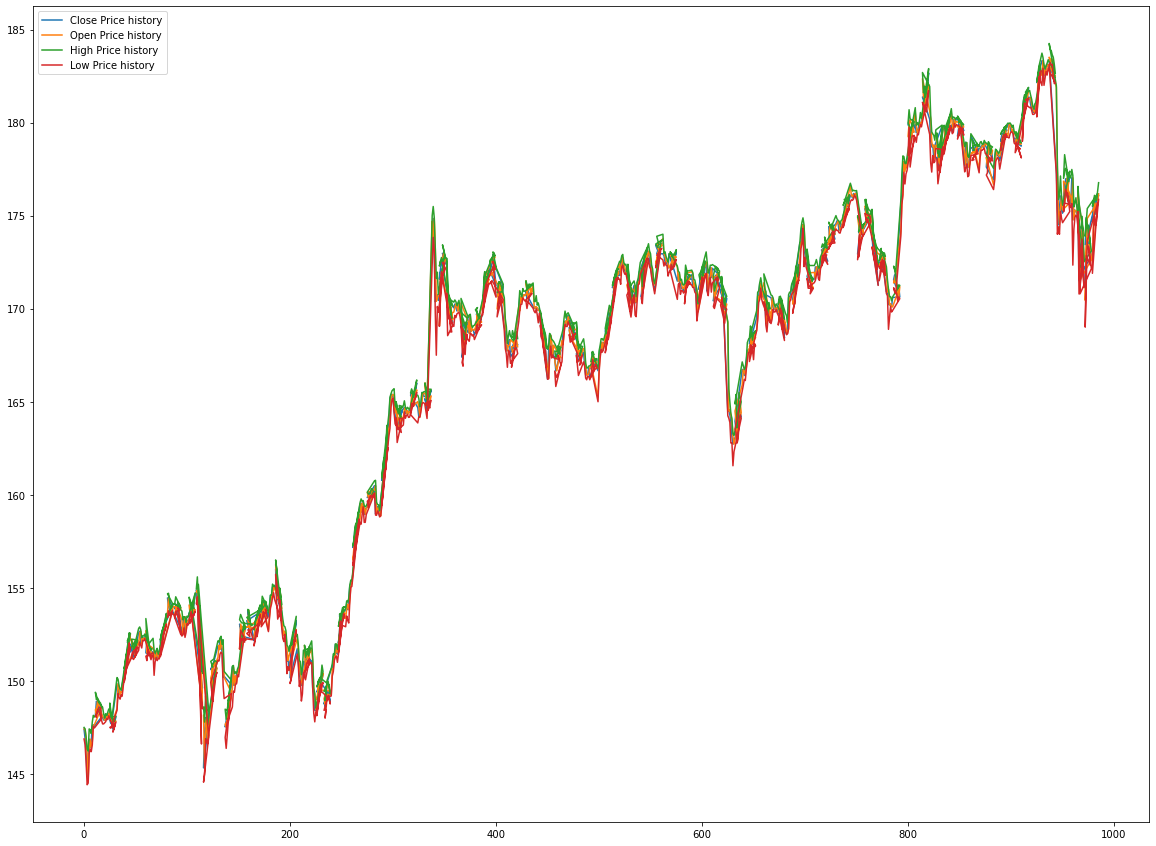

In [6]:
plt.figure(figsize=(20,15))
plt.plot(df['Close'], label='Close Price history')
plt.plot(df['Open'], label='Open Price history')
plt.plot(df['High'], label='High Price history')
plt.plot(df['Low'], label='Low Price history')
plt.legend()

In [7]:
# get last date
# last_day = '2017-05-18'

train_set = df.copy()

In [8]:
train_set = train_set.drop(['Date','Time'],1)
train_set

,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,Open_1,Open_2,...,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean,class_column
0,147.4200,147.5000,146.8800,147.404,1447021,-0.016,0.6200,0.0160,0.6700,-0.2100,...,0.4560,-0.1895,-0.2940,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,0
1,147.4001,147.4200,146.5800,146.910,1639010,-0.494,0.8400,0.4901,-0.0199,0.6501,...,0.1951,0.9301,0.2846,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,-1
2,146.9100,146.9834,145.6200,146.080,3303803,-0.830,1.3634,0.8300,-0.4901,-0.5100,...,0.5107,0.5350,1.2700,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,-1
3,146.0800,146.3300,144.4216,144.850,7778376,-1.230,1.9084,1.2300,-0.8300,-1.3201,...,1.5250,0.9107,0.9350,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525,-1
4,144.7200,146.2300,144.5100,146.100,4087815,1.250,1.7200,-1.3800,-1.3600,-2.1900,...,-1.3400,-1.0850,-1.6993,146.589286,147.457486,146.394286,146.992371,1.063200,-0.403086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,174.6776,175.7500,174.1950,175.740,2830563,1.070,1.5550,-1.0624,2.1776,2.0276,...,1.9226,-2.1824,-2.6024,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,1
981,175.7100,176.0900,174.9500,175.500,1945926,-0.240,1.1400,0.2100,1.0324,3.2100,...,1.6508,3.1950,-0.9100,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,-1
982,175.4800,175.8200,174.4600,175.080,1330343,-0.420,1.3600,0.4000,-0.2300,0.8024,...,-0.5784,1.8408,3.3850,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,-1
983,175.1100,175.8200,174.7000,175.700,1146662,0.620,1.1200,-0.5900,-0.3700,-0.6000,...,-0.8700,-1.5684,0.8508,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200,1


In [9]:
train_x = train_set.drop(['class_column'],1)
train_y = train_set['class_column']
train_x

,Open,High,Low,Close,Volume,Close_diff,h_l_diff,o_c_diff,Open_1,Open_2,...,o_c_diff_7,o_c_diff_8,o_c_diff_9,o_c_diff_10,Open_daily_mean,High_daily_mean,Low_daily_mean,Close_daily_mean,h_l_diff_daily_mean,o_c_diff_daily_mean
0,147.4200,147.5000,146.8800,147.404,1447021,-0.016,0.6200,0.0160,0.6700,-0.2100,...,-0.2790,0.4560,-0.1895,-0.2940,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525
1,147.4001,147.4200,146.5800,146.910,1639010,-0.494,0.8400,0.4901,-0.0199,0.6501,...,0.1708,0.1951,0.9301,0.2846,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525
2,146.9100,146.9834,145.6200,146.080,3303803,-0.830,1.3634,0.8300,-0.4901,-0.5100,...,1.1250,0.5107,0.5350,1.2700,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525
3,146.0800,146.3300,144.4216,144.850,7778376,-1.230,1.9084,1.2300,-0.8300,-1.3201,...,1.2700,1.5250,0.9107,0.9350,146.952525,147.058350,145.875400,146.311000,1.182950,0.641525
4,144.7200,146.2300,144.5100,146.100,4087815,1.250,1.7200,-1.3800,-1.3600,-2.1900,...,-1.7500,-1.3400,-1.0850,-1.6993,146.589286,147.457486,146.394286,146.992371,1.063200,-0.403086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,174.6776,175.7500,174.1950,175.740,2830563,1.070,1.5550,-1.0624,2.1776,2.0276,...,0.3784,1.9226,-2.1824,-2.6024,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200
981,175.7100,176.0900,174.9500,175.500,1945926,-0.240,1.1400,0.2100,1.0324,3.2100,...,-0.7684,1.6508,3.1950,-0.9100,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200
982,175.4800,175.8200,174.4600,175.080,1330343,-0.420,1.3600,0.4000,-0.2300,0.8024,...,0.1200,-0.5784,1.8408,3.3850,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200
983,175.1100,175.8200,174.7000,175.700,1146662,0.620,1.1200,-0.5900,-0.3700,-0.6000,...,-0.7300,-0.8700,-1.5684,0.8508,175.051086,175.990000,174.537857,175.564286,1.452143,-0.513200


In [10]:
train_y

0      0
1     -1
2     -1
3     -1
4      1
      ..
980    1
981   -1
982   -1
983    1
985    0
Name: class_column, Length: 986, dtype: int64

In [11]:
classifiers = dict()
classifiers['RandomForestClassifier 1'] = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0,criterion='gini')
classifiers['RandomForestClassifier 2'] = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0,criterion='gini')
classifiers['RandomForestClassifier 3'] = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0,criterion='gini')
classifiers['RandomForestClassifier 4'] = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0,criterion='gini')
classifiers['RandomForestClassifier 5'] = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0,criterion='entropy')
classifiers['RandomForestClassifier 6'] = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0,criterion='entropy')
classifiers['RandomForestClassifier 7'] = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0,criterion='entropy')
classifiers['RandomForestClassifier 8'] = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0,criterion='entropy')

classifiers['DecisionTreeClassifier 1'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='gini',splitter='best')
classifiers['DecisionTreeClassifier 2'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='gini',splitter='random')
classifiers['DecisionTreeClassifier 3'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='entropy',splitter='best')
classifiers['DecisionTreeClassifier 4'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='entropy',splitter='random')
classifiers['DecisionTreeClassifier 5'] = DecisionTreeClassifier(random_state=0,criterion='gini',splitter='best')
classifiers['DecisionTreeClassifier 6'] = DecisionTreeClassifier(random_state=0,criterion='gini',splitter='random')
classifiers['DecisionTreeClassifier 7'] = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
classifiers['DecisionTreeClassifier 8'] = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')

classifiers['GradientBoostingClassifier 1'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.1)
classifiers['GradientBoostingClassifier 2'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.3)
classifiers['GradientBoostingClassifier 3'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.5)
classifiers['GradientBoostingClassifier 4'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=1)

classifiers['GradientBoostingClassifier 5'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.1)
classifiers['GradientBoostingClassifier 6'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.3)
classifiers['GradientBoostingClassifier 7'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.5)
classifiers['GradientBoostingClassifier 8'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=1)

classifiers['GradientBoostingClassifier 9'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=0.1)
classifiers['GradientBoostingClassifier 10'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=0.3)
classifiers['GradientBoostingClassifier 11'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=0.5)
classifiers['GradientBoostingClassifier 12'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=2, learning_rate=1)


In [12]:
folds = 5
predictions= dict()
score = dict()
for k,v in classifiers.items():
    score[k] = cross_valid(v,train_x,train_y,folds=folds)

In [13]:
headers = ["Classifier type", "score"]
score_df = pd.DataFrame(score.items(), columns=headers)
headers = ["Classifier type"] + [f'fold {i}' for i in range(1,folds+1)]
score_df[[f'fold {i}' for i in range(1,folds+1)]] = pd.DataFrame(score_df['score'].tolist(), index= score_df.index)
score_df = score_df.drop('score',1)
print(tabulate(score_df, headers, tablefmt="psql"))

+----+-------------------------------+----------+----------+----------+----------+----------+
|    | Classifier type               |   fold 1 |   fold 2 |   fold 3 |   fold 4 |   fold 5 |
|----+-------------------------------+----------+----------+----------+----------+----------|
|  0 | RandomForestClassifier 1      | 0.994949 | 0.989848 | 0.974619 | 0.969543 | 0.989848 |
|  1 | RandomForestClassifier 2      | 0.989899 | 0.989848 | 0.979695 | 0.974619 | 0.989848 |
|  2 | RandomForestClassifier 3      | 0.994949 | 0.994924 | 0.989848 | 0.984772 | 0.994924 |
|  3 | RandomForestClassifier 4      | 0.994949 | 0.994924 | 0.989848 | 0.989848 | 0.994924 |
|  4 | RandomForestClassifier 5      | 0.994949 | 0.984772 | 0.979695 | 0.969543 | 0.989848 |
|  5 | RandomForestClassifier 6      | 0.994949 | 0.984772 | 0.969543 | 0.974619 | 0.989848 |
|  6 | RandomForestClassifier 7      | 0.994949 | 0.994924 | 0.989848 | 0.969543 | 0.994924 |
|  7 | RandomForestClassifier 8      | 0.994949 | 0.994924 |